**Ironhack Project-4 |** Data exploration

---

**Libraries**

In [19]:
# Data
import numpy as np
import pandas as pd

# SQL
import mysql.connector as msql
import sqlalchemy as alch
from getpass import getpass

# NLP
import nltk
import spacy

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import stylecloud

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (8,4)})
sns.set_style("whitegrid")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mplan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---

**Data import**

In [20]:
# Importing data
got_script = pd.read_csv("../data/game_of_thrones_script.csv")
got_script.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [24]:
# Looking at data type of info and nan
got_script.info()
got_script.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Release Date   23908 non-null  object
 1   Season         23908 non-null  object
 2   Episode        23908 non-null  object
 3   Episode Title  23908 non-null  object
 4   Name           23908 non-null  object
 5   Sentence       23908 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [25]:
got_script['Name'] = got_script['Name'].str.title()

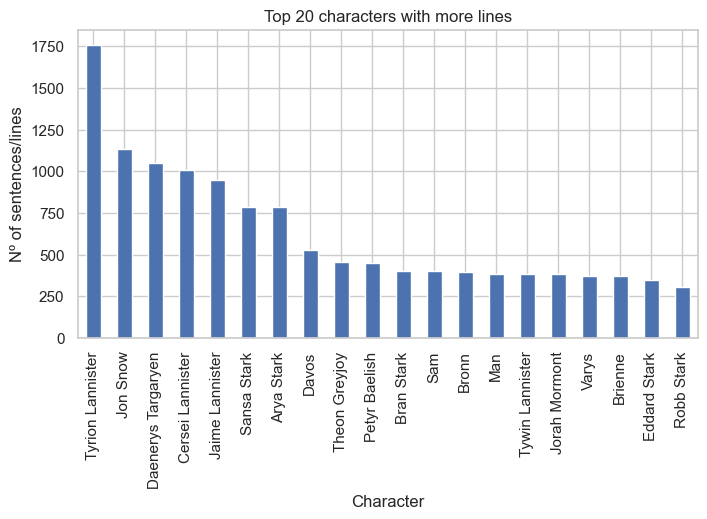

In [26]:
# Visualizing the top 10 characters with more lines in the whole series
got_script.groupby(['Name']).size().sort_values(ascending=False)[:20].plot.bar(
    title = "Top 20 characters with more lines",
    xlabel = "Character",
    ylabel = "Nº of sentences/lines");

In [28]:
# Export
got_script.to_csv("../data/got_script.csv")

---

In [29]:
# Calculating sentiment score 
sid = SentimentIntensityAnalyzer()
got_script[['neg', 'neu', 'pos', 'compound']] = got_script['Sentence'].apply(sid.polarity_scores).apply(pd.Series)
got_script

,Release Date,Season,Episode,Episode Title,Name,Sentence,neg,neu,pos,compound
0,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,What do you expect? They're savages. One lot s...,0.233,0.767,0.000,-0.7717
1,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,I've never seen wildlings do a thing like this...,0.000,0.773,0.227,0.6124
2,2011-04-17,Season 1,Episode 1,Winter is Coming,Waymar Royce,How close did you get?,0.000,1.000,0.000,0.0000
3,2011-04-17,Season 1,Episode 1,Winter is Coming,Will,Close as any man would.,0.000,1.000,0.000,0.0000
4,2011-04-17,Season 1,Episode 1,Winter is Coming,Gared,We should head back to the wall.,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,Brienne,I think we can all agree that ships take prece...,0.000,0.800,0.200,0.3612
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,Bronn,I think that's a very presumptuous statement.,0.000,1.000,0.000,0.0000
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,Tyrion Lannister,I once brought a jackass and a honeycomb into ...,0.318,0.682,0.000,-0.4215
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,Man,The Queen in the North!,0.000,1.000,0.000,0.0000


In [30]:
got_script.groupby(['Season', 'Episode'])['compound'].mean().sort_values()

Season    Episode  
Season 7  Episode 7   -0.066983
Season 4  Episode 8   -0.053705
Season 6  Episode 7   -0.042842
          Episode 9   -0.037350
Season 3  Episode 4   -0.037013
                         ...   
Season 5  Episode 7    0.049236
Season 8  Episode 4    0.050529
Season 6  Episode 3    0.052869
          Episode 5    0.063241
Season 5  Episode 9    0.066596
Name: compound, Length: 73, dtype: float64

In [ ]:
# Most negative
filter_s = got_script['Season'] == 'Season 7'
filter_ep = got_script['Episode'] == 'Episode 7'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

In [ ]:
# Most positive
filter_s = got_script['Season'] == 'Season 5'
filter_ep = got_script['Episode'] == 'Episode 9'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

In [ ]:
# Red wedding
filter_s = got_script['Season'] == 'Season 3'
filter_ep = got_script['Episode'] == 'Episode 9'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

In [ ]:
# Ramsay tortures Theon
filter_s = got_script['Season'] == 'Season 3'
filter_ep = got_script['Episode'] == 'Episode 7'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

In [ ]:
got_script[got_script['Name'] == 'petyr baelish'].plot(y='compound', use_index=True);

In [ ]:
# Filtering out non-top characters
got_top = got_script.groupby(['Name']).size().sort_values(ascending=False)[:20]
got_top_characters = got_top.index.values
got_top_sentiment = got_script[got_script['Name'].isin(got_top_characters)]

In [ ]:
# Calculating sentiment score
sid = SentimentIntensityAnalyzer()
got_top_sentiment[['neg', 'neu', 'pos', 'compound']] = got_top_sentiment['Sentence'].apply(sid.polarity_scores).apply(pd.Series)
got_top_sentiment

In [ ]:
got_top_sentiment.groupby('Name')['compound'].mean().sort_values()

In [ ]:
# Set of stop words
stop_words = set(stopwords.words('english'))

# Tokenize words of each sentence
word_tokens = word_tokenize(got_script.iloc[0]['Sentence'])

# Get words not present in stop words set
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

# Remove symbols
symbols = ['?', '!', ',', '.']
filtered_sentence = [w for w in filtered_sentence if not w.lower() in symbols]

print(word_tokens)
print(filtered_sentence)

In [ ]:
def filter_stopwords (sentence):
    
    # Set of stop words
    stop_words = set(stopwords.words('english'))

    # Tokenize words of each sentence
    word_tokens = word_tokenize(sentence)

    # Get words not present in stop words set
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

    # Remove symbols
    symbols = ['?', '!', ',', '.']
    filtered_sentence = [w for w in filtered_sentence if not w.lower() in symbols]

    return " ".join(filtered_sentence)

In [ ]:
got_script['Sentence'] = got_script['Sentence'].apply(lambda x: filter_stopwords(x))
got_script

In [ ]:
got_script[['neg2', 'neu2', 'pos2', 'compound2']] = got_script['Sentence'].apply(sid.polarity_scores).apply(pd.Series)
got_script

In [ ]:
got_script.groupby(['Season', 'Episode'])['compound2'].mean().sort_values()

In [ ]:
# Most negative
filter_s = got_script['Season'] == 'Season 4'
filter_ep = got_script['Episode'] == 'Episode 8'
got_script[filter_s & filter_ep].plot(y='compound', use_index=True);

In [ ]:
got_script.iloc[13550:13600]

In [ ]:
nlp = spacy.load("en_core_web_sm")